# ESRB rating machine learning

In [24]:
%pip install numpy==1.24.1
%pip install pandas==1.5.3
%pip install seaborn==0.12.2
%pip install scikit-learn==1.2.0
%pip install plotly==5.12.0
%pip install matplotlib==3.6.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
# import general libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [26]:
# CSV file with the ESRB rating data
df = pd.read_csv('Video_games_esrb_rating.csv')

In [27]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


## Pre processing

In [28]:
# Correcting typo in the original dataframe
df = df.rename(columns={"strong_janguage": "strong_language"})

In [29]:
# check all columns
# check if there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [30]:
# drop the title and console columns, because it is not needed for the analysis
df.drop(['title', 'console'], inplace=True, axis=1)

In [31]:
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [32]:
df.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,T


In [33]:
# Replace the ESRB ratings with numbers, this is needed for some of the models
df['esrb_rating'] = df['esrb_rating'].replace(
    'E', 0).replace('ET', 1).replace('T', 2).replace('M', 3)

In [34]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

## Splitting dataset

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

## Decision tree (Anwar Ammour)

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# Make predictions
y_pred_tree = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 96   2   1   0]
 [  3  51   7   0]
 [  2  19 119   6]
 [  0   0  12  61]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.71      0.84      0.77        61
           2       0.86      0.82      0.84       146
           3       0.91      0.84      0.87        73

    accuracy                           0.86       379
   macro avg       0.86      0.86      0.86       379
weighted avg       0.87      0.86      0.86       379



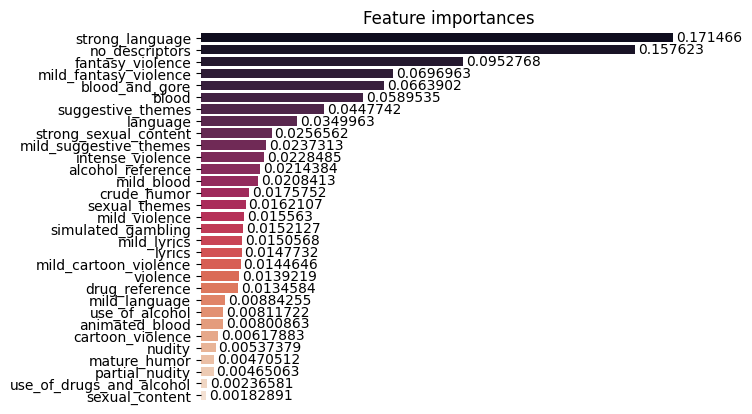

In [41]:
# print feature importance
features_df = pd.DataFrame(
    {'features': classifier.feature_names_in_, 'importances': classifier.feature_importances_})

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances',
                y='features', palette="rocket")
sns.despine(bottom=True, left=True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

## Random Forest (Remco de Wilde)

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create instance of random forest classifier
rfc = RandomForestClassifier(n_estimators=20,
                             max_depth=11,
                             random_state=SEED)

In [43]:
# Train the classifier
rfc.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rt = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                       random_state=1608637542)


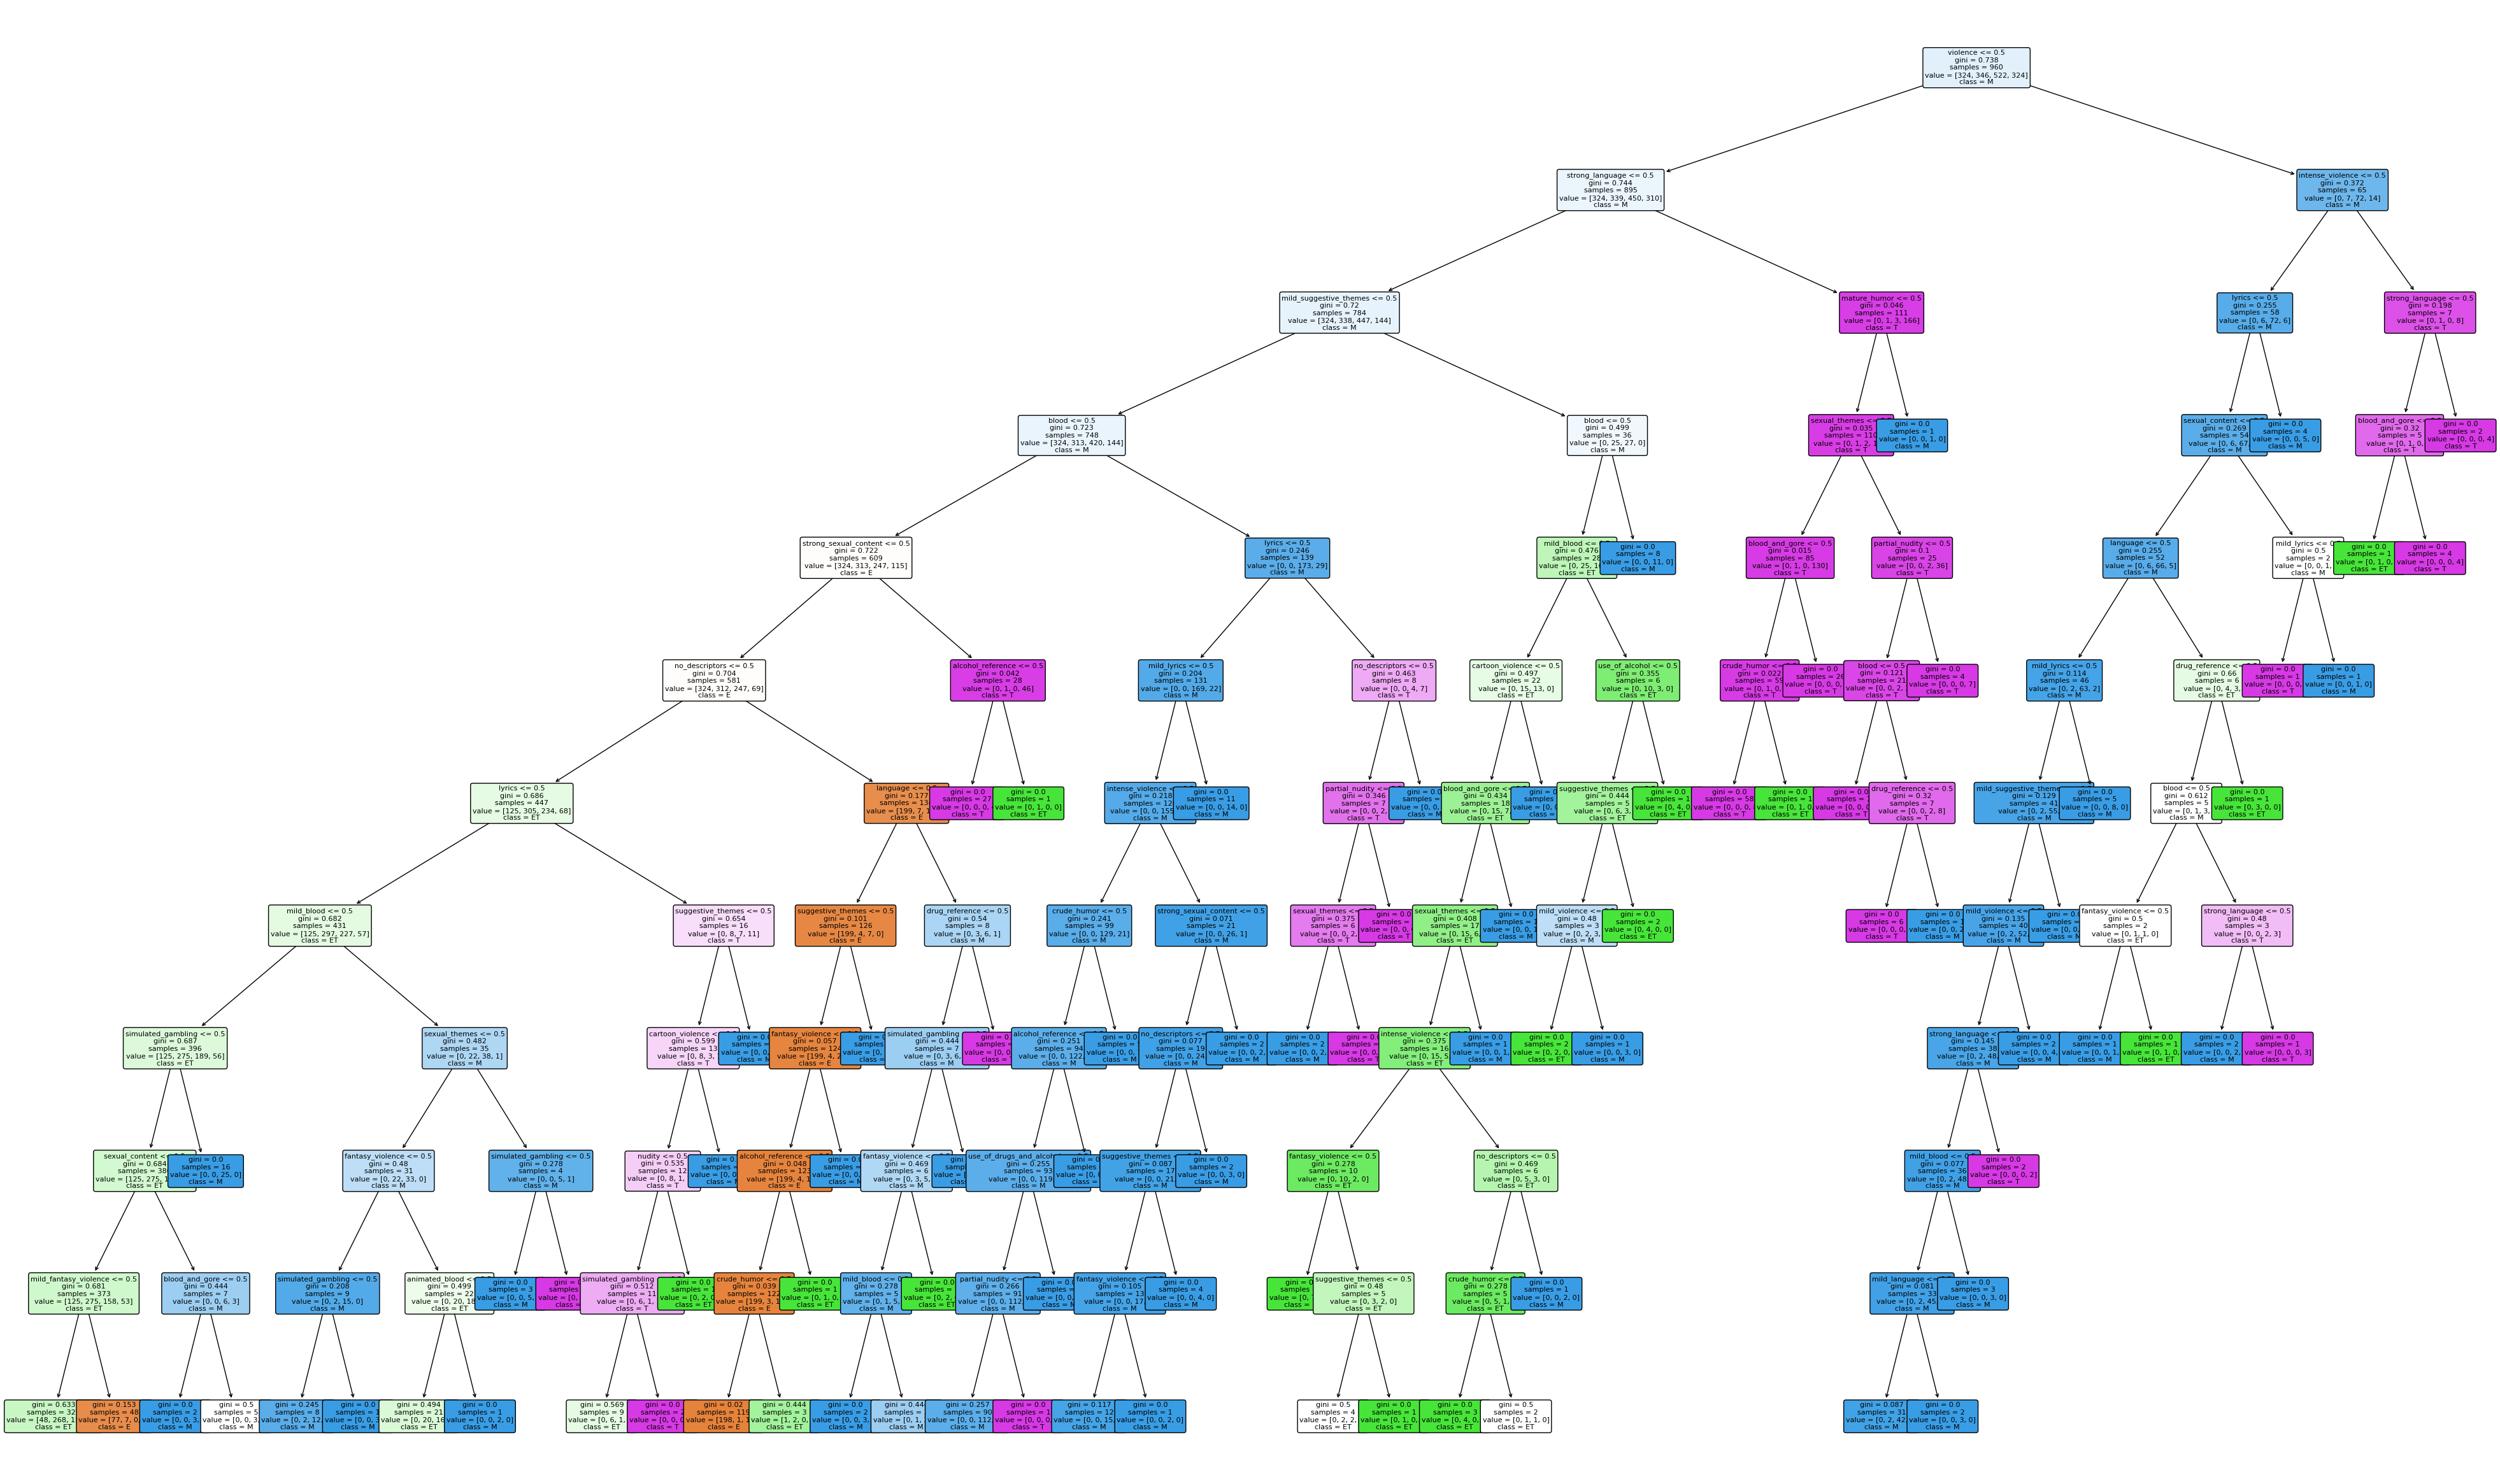

DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                       random_state=1273642419)


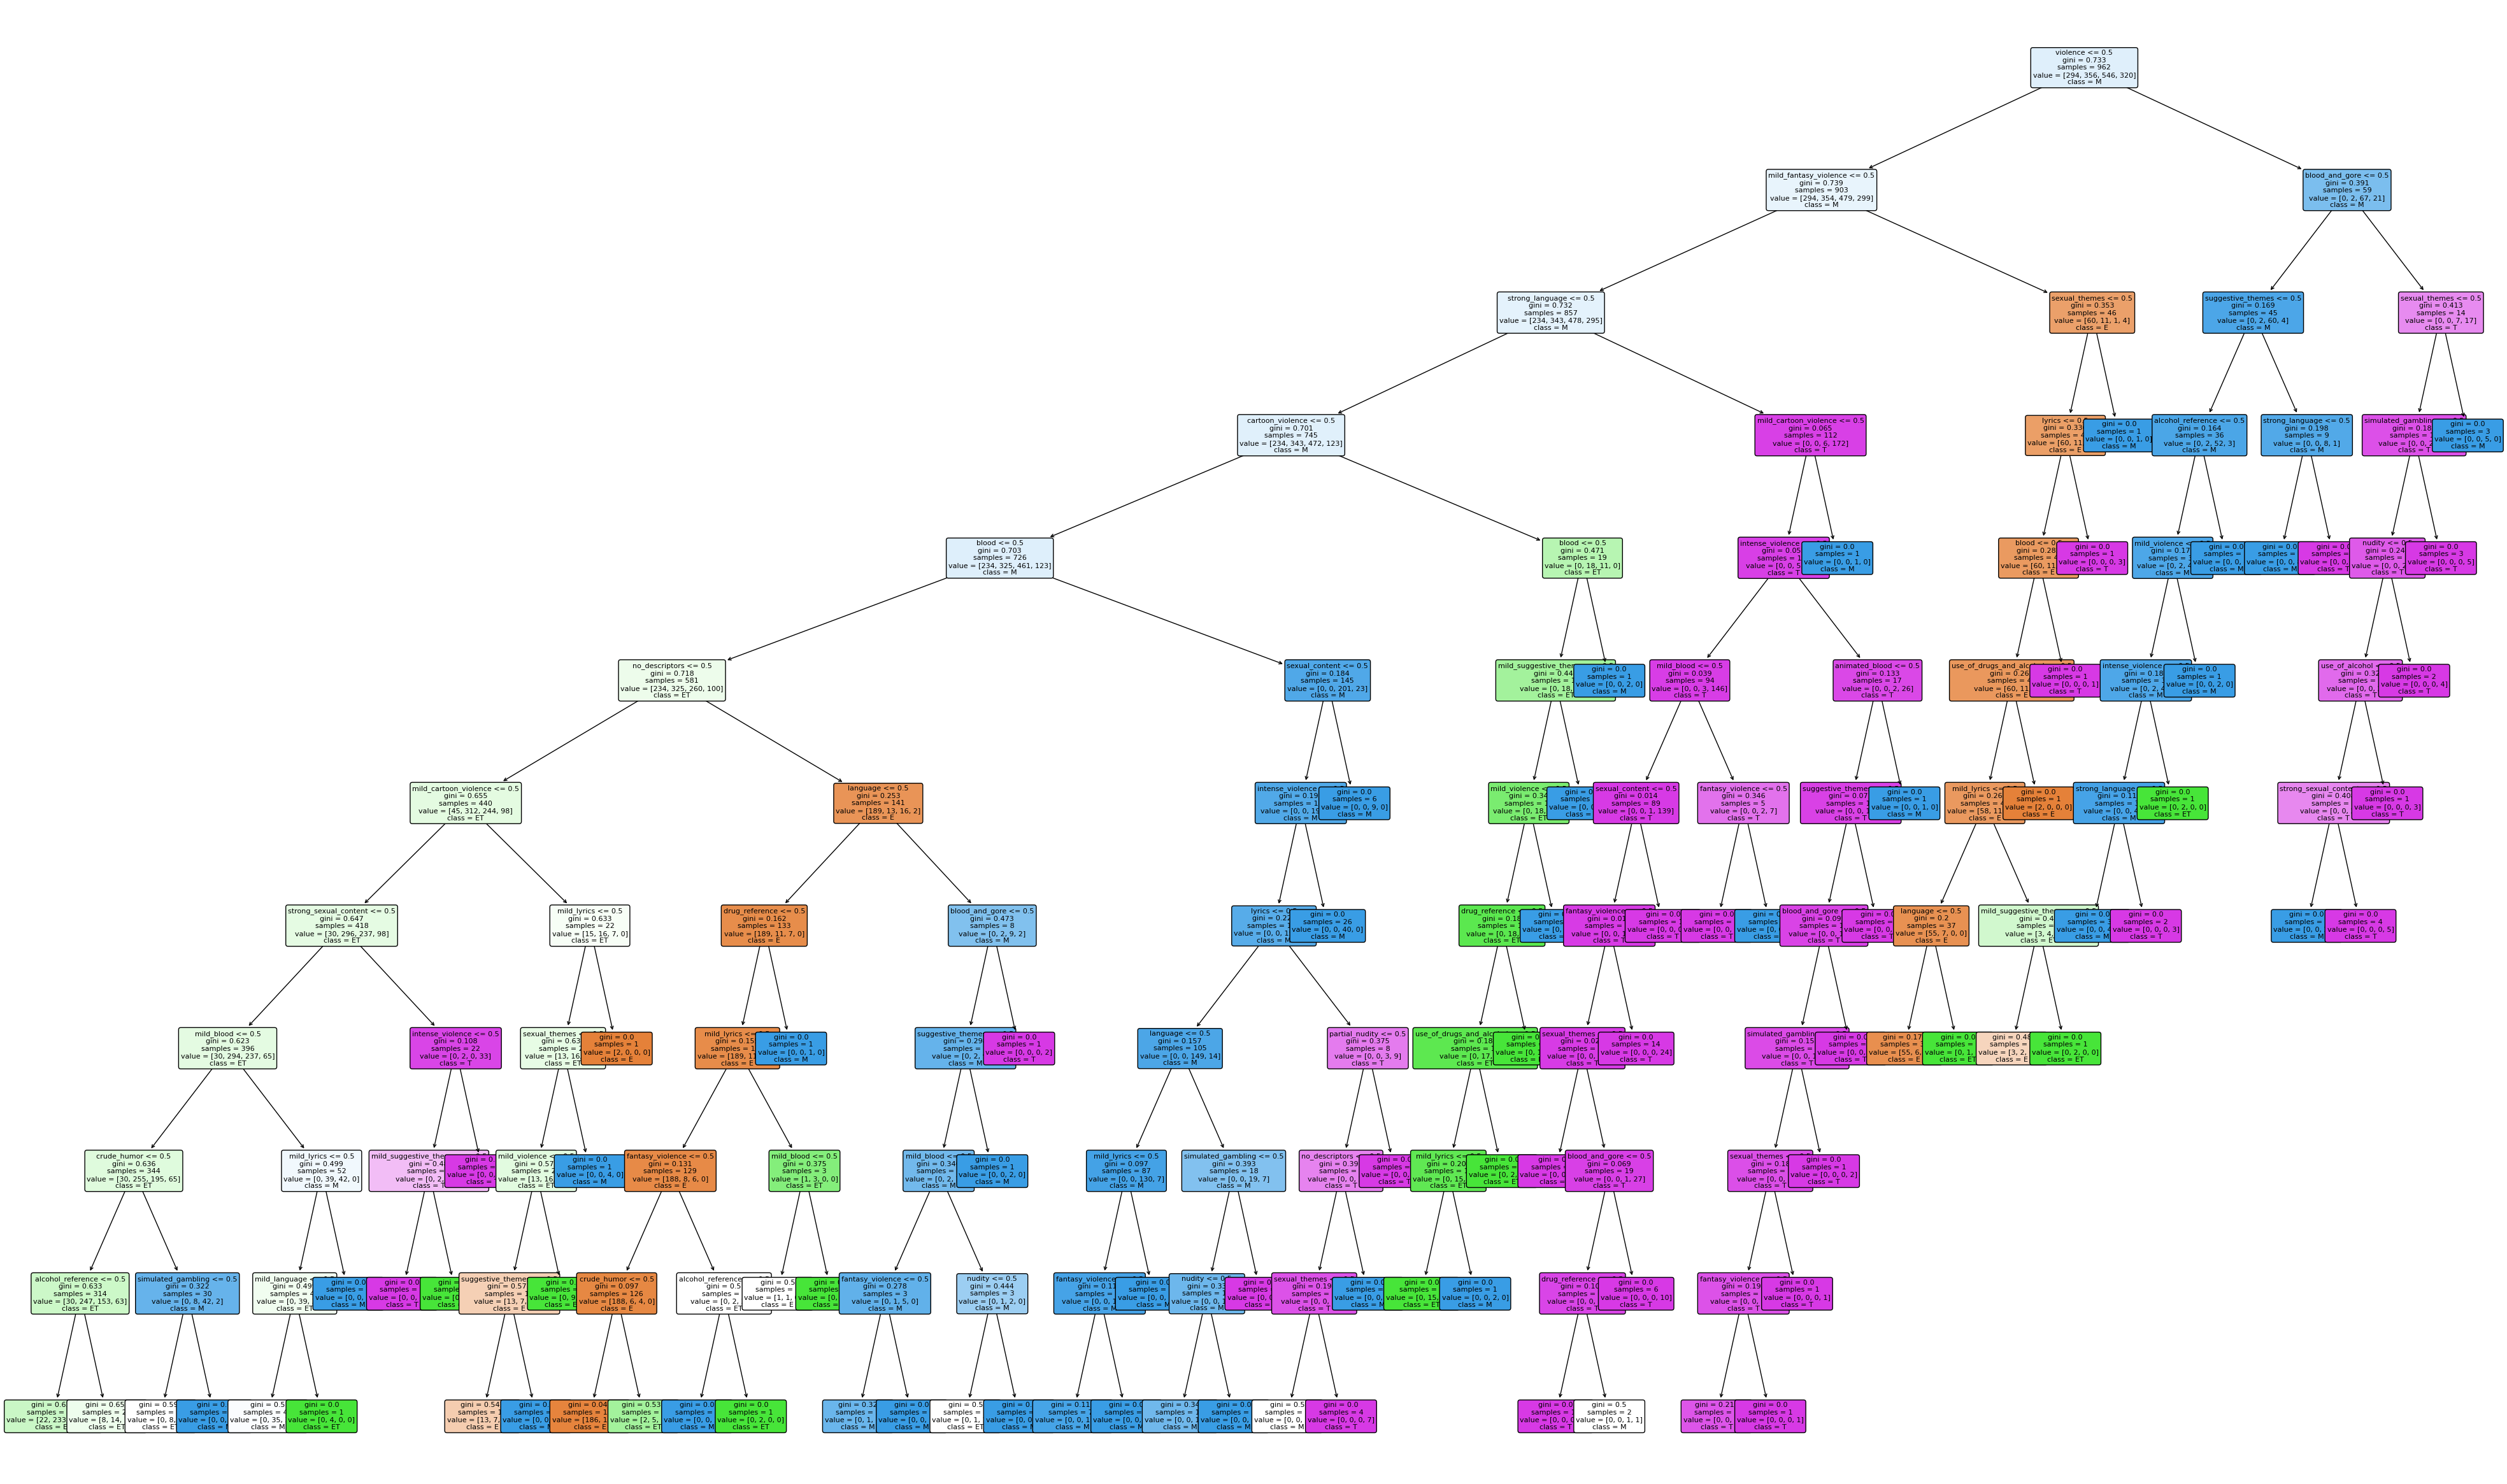

DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                       random_state=1935803228)


In [44]:
features = X.columns.values  # The name of each column

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12, 6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=ratings,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()